In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [11]:
np.unique(y) #3 different classes for target label

array([0, 1, 2])

In [4]:
from sklearn.cross_validation import train_test_split

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler() #remove the mean and scale to unit variance
sc.fit(xtrain)
xtrain_std = sc.transform(xtrain)
xtest_std = sc.transform(xtest)

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(xtrain_std, ytrain)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [13]:
ypred = ppn.predict(xtest_std)
print "Misclassified samples:", (ypred != ytest).sum()
print "Total number of test samples:", len(ytest)

Misclassified samples: 4
Total number of test samples: 45


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
print "Perceptron accuracy:", accuracy_score(ytest, ypred)

Perceptron accuracy: 0.911111111111


In [16]:
from matplotlib.colors import ListedColormap

In [17]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


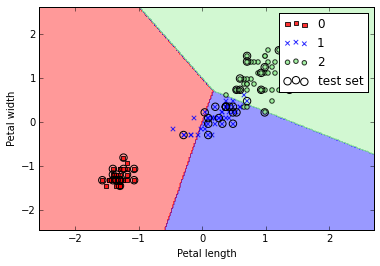

In [18]:
x_combined_std = np.vstack((xtrain_std, xtest_std))
y_combined = np.hstack((ytrain, ytest))
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc='best')
plt.show()

In [19]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

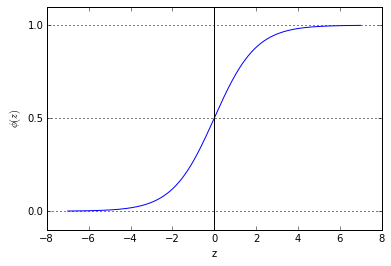

In [27]:
z = np.arange(-7, 7, 0.01)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel('$\phi (z)$')
plt.show()

In [28]:
def loss0(z):
    #loss function when y=0
    return -np.log(1-sigmoid(z))

def loss1(z):
    #loss function when y=1
    return -np.log(sigmoid(z))

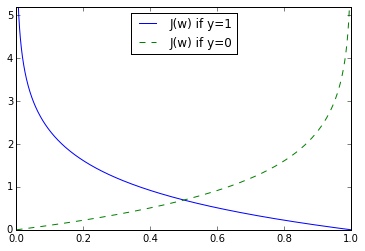

In [35]:
z=np.arange(-10, 10, 0.02) #cost approaches zero for correct predictions
phi_z = sigmoid(z)
c1 = [loss1(x) for x in z]
plt.plot(phi_z, c1, label="J(w) if y=1")
c0 = [loss0(x) for x in z]
plt.plot(phi_z, c0, label="J(w) if y=0", linestyle='--')
plt.ylim(0.0, 5.2)
plt.legend(loc="best")

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(xtrain_std, ytrain)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0)

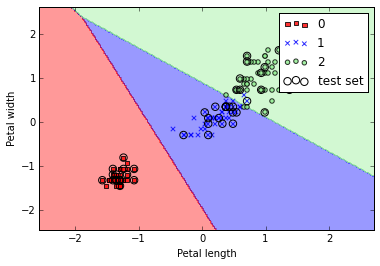

In [38]:
plot_decision_regions(x_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc='best')

In [39]:
lr.predict_proba(xtest_std[0, :])

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [40]:
lrpreds = lr.predict(xtest_std)
print "Accuracy using logistic regresssion:", accuracy_score(lrpreds, ytest)

Accuracy using logistic regresssion: 0.977777777778


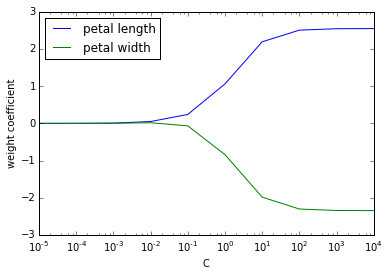

In [42]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0) #smaller C >> stronger regularization
    lr.fit(xtrain_std, ytrain)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length') #coefficients from logistic regression
plt.plot(params, weights[:, 1], label='petal width')
plt.ylabel("weight coefficient")
plt.xlabel("C")
plt.legend(loc='best')
plt.xscale('log')
#coefficients increase in absolute value as regularization=1/C becomes smaller

In [44]:
from sklearn.svm import SVC

In [45]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(xtrain_std, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

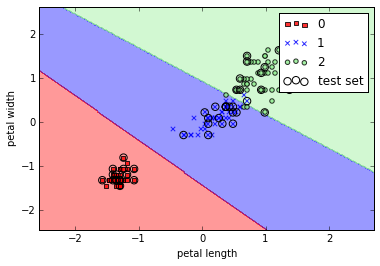

In [47]:
plot_decision_regions(x_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel("petal length")
plt.ylabel('petal width')
plt.legend(loc='best')

In [48]:
print "Test accuracy with SVM:", accuracy_score(svm.predict(xtest_std), ytest)

Test accuracy with SVM: 0.977777777778


In [50]:
np.random.seed(0)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0]>0, x_xor[:, 1]>0)
y_xor = np.where(y_xor, 1, -1)

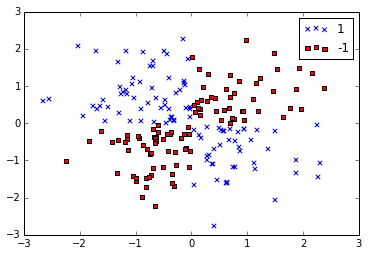

In [53]:
plt.scatter(x_xor[y_xor==1, 0], x_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(x_xor[y_xor==-1, 0], x_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend(loc='best')

In [54]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(x_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.1,
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

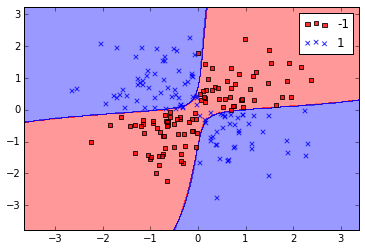

In [55]:
plot_decision_regions(x_xor, y_xor, classifier=svm)
plt.legend(loc='best')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.2,
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC accuracy with radial kernel: 0.8


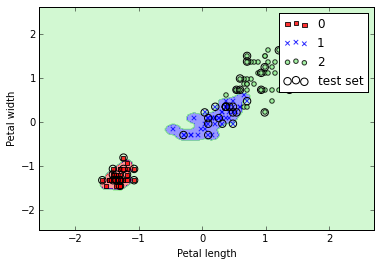

In [62]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.2, C=1.0)
svm.fit(xtrain_std, ytrain)
plot_decision_regions(x_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc='best')
print "SVC accuracy with radial kernel:", accuracy_score(svm.predict(xtest_std), ytest)

In [63]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

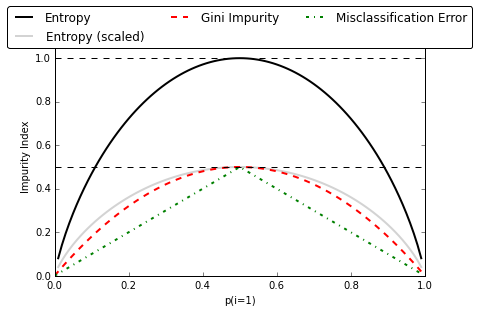

In [64]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
from sklearn.tree import DecisionTreeClassifier

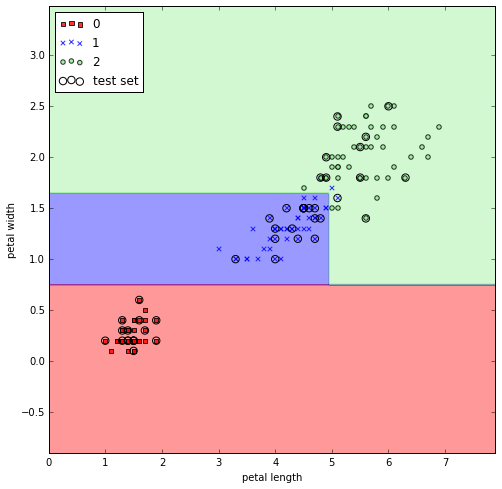

In [70]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(xtrain, ytrain) #feature scaling not necessary
x_combined = np.vstack((xtrain, xtest))
y_combined = np.hstack((ytrain, ytest))
plt.figure(figsize=(8, 8))
plot_decision_regions(x_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc='upper left')

In [71]:
print "Decision tree accuracy:", accuracy_score(tree.predict(xtest), ytest)

Decision tree accuracy: 0.977777777778


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=1)
forest.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

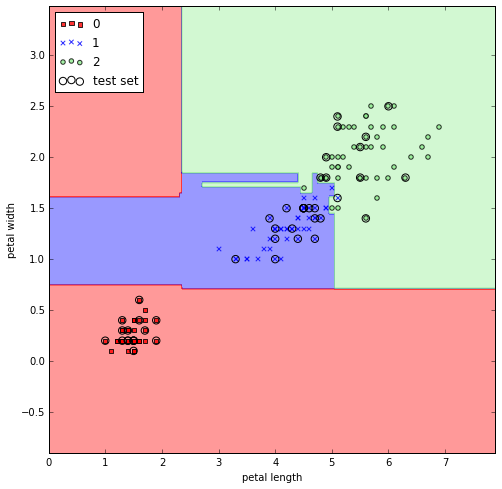

In [85]:
plt.figure(figsize=(8, 8))
plot_decision_regions(x_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')

In [86]:
print "Random forest accuracy on test data:", accuracy_score(forest.predict(xtest), ytest)

Random forest accuracy on test data: 0.977777777778


In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(xtrain_std, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

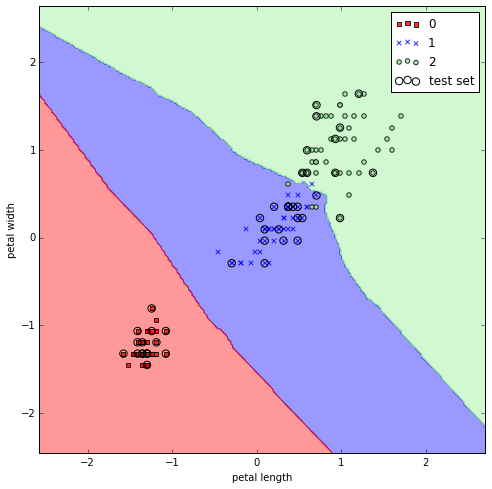

In [90]:
plt.figure(figsize=(8, 8))
plot_decision_regions(x_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel("petal length")
plt.ylabel('petal width')
plt.legend(loc='best')

In [91]:
print "KNN accuracy on test set:", accuracy_score(knn.predict(xtest_std), ytest)

KNN accuracy on test set: 1.0
